# AI Clinique #14 : Discover patterns in your data with Clustering

- Date : 26-11-2021
- Presentators : N. Clavel
- Dataset : For this hands-on, we will be using the ...
- Packages : requirements.txt

### Table of contents
- 1. Case introduction
...

#### Imports

In [95]:
import sklearn
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1. First case of clustering on the sklearn Iris dataset

#### 1.1. Load the dataset
A quick description of the dataset can be found here : https://archive.ics.uci.edu/ml/datasets/Iris

In [96]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Get targets & targets labels
target_labels = {value:label for value, label in enumerate(iris.target_names)}
iris_df['Species'] = iris.target
iris_df['Species'] = iris_df['Species'].map(target_labels)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1.2. Description

In [97]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Features consist of :
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

The target is the Species (setosa, versicolor & verginica), but we will drop it as we focus on clustering (unsupervised learning)

#### 1.3. Datavizualisation

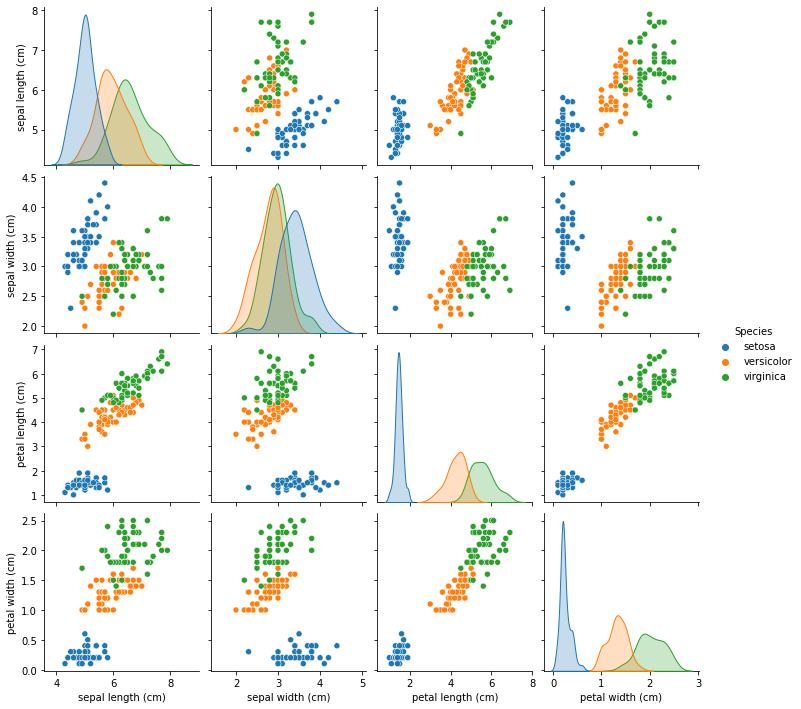

In [98]:
sns.pairplot(iris_df , hue='Species')

<AxesSubplot:xlabel='Species', ylabel='sepal length (cm)'>

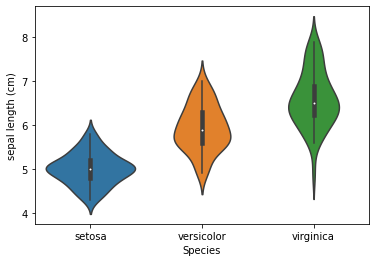

In [99]:
sns.violinplot(x='Species', y='sepal length (cm)', data=iris_df, size=6)

<AxesSubplot:xlabel='Species', ylabel='petal length (cm)'>

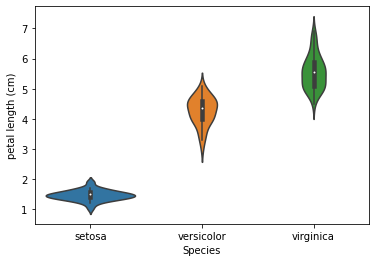

In [100]:
sns.violinplot(x='Species', y='petal length (cm)', data=iris_df, size=6)

For each species, the distribution of data seems to be distributed around a value.

#### 1.4. Objective :

Let's assume that the Species are not known.  
The goal is to learn something from the data by exploring it, without any knowledge of the target, to discover if observations that have similar properties.

In [101]:
iris_species = iris_df['Species']
iris_df = iris_df.drop('Species', axis=1)

#### 1.5. KMeans clustering
In the KMeans clustering, we must assume the number of clusters.

In [102]:
# Train kmeans nb_clusters = 3
kmeans = KMeans(n_clusters=nb_clusters, n_init=50, max_iter=1000)
kmeans.fit(iris_df)

# Get cluster labels
labels = [f'cluster {l+1}' for l in kmeans.labels_]
iris_df['Cluster'] = labels

# Get true lables (species)
iris_df['Species'] = iris_species

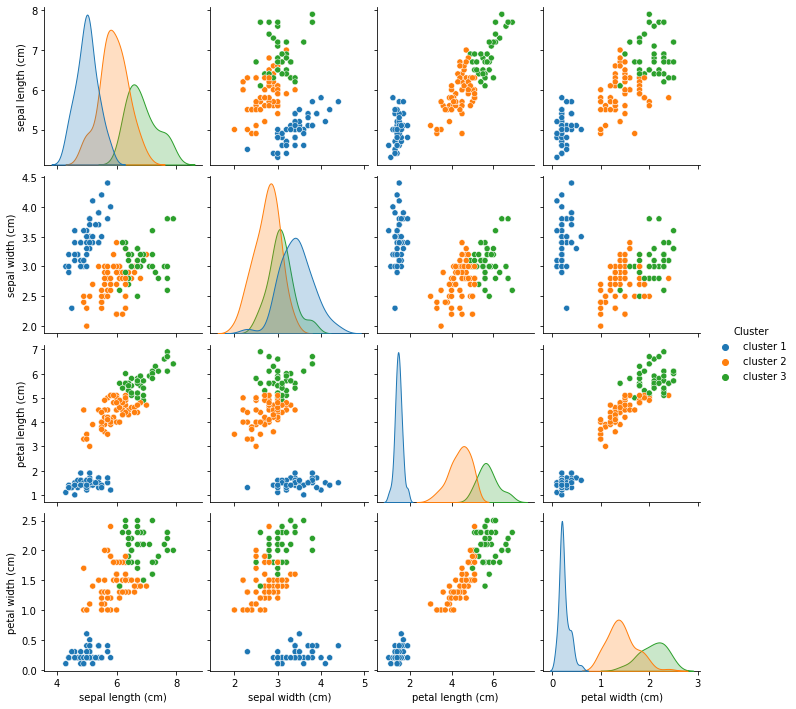

In [103]:
sns.pairplot(iris_df , hue='Cluster')

In [104]:
pd.crosstab(iris_df['Cluster'], iris_df['Species'])

Species,setosa,versicolor,virginica
Cluster,,,
cluster 1,50,0,0
cluster 2,0,48,14
cluster 3,0,2,36


In [ ]:
The clustering seems to have nearly disco